<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Area Plots, Histograms, and Bar Plots

Estimated time needed: **30** minutes

## Objectives

After completing this lab you will be able to:

-   Create additional labs namely area plots, histogram and bar charts


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Exploring Datasets with _pandas_](#0)<br>
2.  [Downloading and Prepping Data](#2)<br>
3.  [Visualizing Data using Matplotlib](#4) <br>
4.  [Area Plots](#6) <br>
5.  [Histograms](#8) <br>
6.  [Bar Charts](#10) <br>
    </div>
    <hr>


# Exploring Datasets with _pandas_ and Matplotlib<a id="0"></a>

Toolkits: The course heavily relies on [_pandas_](http://pandas.pydata.org?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ) and [**Numpy**](http://www.numpy.org?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ) for data wrangling, analysis, and visualization. The primary plotting library that we are exploring in the course is [Matplotlib](http://matplotlib.org?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).

Dataset: Immigration to Canada from 1980 to 2013 - [International migration flows to and from selected countries - The 2015 revision](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ) from United Nation's website.

The dataset contains annual data on the flows of international migrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. For this lesson, we will focus on the Canadian Immigration data.


# Downloading and Prepping Data <a id="2"></a>


Import Primary Modules. The first thing we'll do is import two key data analysis modules: _pandas_ and **Numpy**.


In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

Let's download and import our primary Canadian Immigration dataset using _pandas_ `read_excel()` method. Normally, before we can do that, we would need to download a module which _pandas_ requires to read in excel files. This module is **xlrd**. For your convenience, we have pre-installed this module, so you would not have to worry about that. Otherwise, you would need to run the following line of code to install the **xlrd** module:

```
!conda install -c anaconda xlrd --yes
```


Download the dataset and read it into a _pandas_ dataframe.


In [2]:

df_can = pd.read_excel('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


Let's take a look at the first five items in our dataset.


In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935.0,Asia,5501.0,Southern Asia,902.0,Developing regions,16.0,...,2635.0,2004.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908.0,Europe,925.0,Southern Europe,901.0,Developed regions,1.0,...,620.0,603.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Immigrants,Foreigners,Algeria,903.0,Africa,912.0,Northern Africa,902.0,Developing regions,80.0,...,3774.0,4331.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Immigrants,Foreigners,American Samoa,909.0,Oceania,957.0,Polynesia,902.0,Developing regions,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Immigrants,Foreigners,Andorra,908.0,Europe,925.0,Southern Europe,901.0,Developed regions,0.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's find out how many entries there are in our dataset.


In [4]:
# print the dimensions of the dataframe
print(df_can.shape)

(1013, 51)


Clean up data. We will make some modifications to the original dataset to make it easier to create our visualizations. Refer to `Introduction to Matplotlib and Line Plots` lab for the rational and detailed description of the changes.


#### 1. Clean up the dataset to remove columns that are not informative to us for visualization (eg. Type, AREA, REG).


In [5]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Afghanistan,Asia,Southern Asia,Developing regions,16.0,39.0,39.0,47.0,71.0,340.0,...,2635.0,2004.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,Europe,Southern Europe,Developed regions,1.0,0.0,0.0,0.0,0.0,0.0,...,620.0,603.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,Africa,Northern Africa,Developing regions,80.0,67.0,71.0,69.0,63.0,44.0,...,3774.0,4331.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,American Samoa,Oceania,Polynesia,Developing regions,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,Europe,Southern Europe,Developed regions,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Notice how the columns Type, Coverage, AREA, REG, and DEV got removed from the dataframe.


#### 2. Rename some of the columns so that they make sense.


In [6]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Afghanistan,Asia,Southern Asia,Developing regions,16.0,39.0,39.0,47.0,71.0,340.0,...,2635.0,2004.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,Europe,Southern Europe,Developed regions,1.0,0.0,0.0,0.0,0.0,0.0,...,620.0,603.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,Africa,Northern Africa,Developing regions,80.0,67.0,71.0,69.0,63.0,44.0,...,3774.0,4331.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,American Samoa,Oceania,Polynesia,Developing regions,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,Europe,Southern Europe,Developed regions,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Notice how the column names now make much more sense, even to an outsider.


#### 3. For consistency, ensure that all column labels of type string.


In [7]:
# let's examine the types of the column labels
all(isinstance(column, str) for column in df_can.columns)

False

Notice how the above line of code returned _False_ when we tested if all the column labels are of type **string**. So let's change them all to **string** type.


In [8]:
df_can.columns = list(map(str, df_can.columns))

# let's check the column labels types now
all(isinstance(column, str) for column in df_can.columns)

True

#### 4. Set the country name as index - useful for quickly looking up countries using .loc method.


In [9]:
df_can.set_index('Country', inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16.0,39.0,39.0,47.0,71.0,340.0,496.0,...,2635.0,2004.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,Europe,Southern Europe,Developed regions,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,620.0,603.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,Africa,Northern Africa,Developing regions,80.0,67.0,71.0,69.0,63.0,44.0,69.0,...,3774.0,4331.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
American Samoa,Oceania,Polynesia,Developing regions,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,Europe,Southern Europe,Developed regions,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Notice how the country names now serve as indices.


#### 5. Add total column.


In [10]:
df_can['Total'] = df_can.sum(axis=1)

# let's view the first five elements and see how the dataframe was changed
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16.0,39.0,39.0,47.0,71.0,340.0,496.0,...,2004.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58639.0
Albania,Europe,Southern Europe,Developed regions,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,603.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15699.0
Algeria,Africa,Northern Africa,Developing regions,80.0,67.0,71.0,69.0,63.0,44.0,69.0,...,4331.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69439.0
American Samoa,Oceania,Polynesia,Developing regions,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
Andorra,Europe,Southern Europe,Developed regions,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0


Now the dataframe has an extra column that presents the total number of immigrants from each country in the dataset from 1980 - 2013. So if we print the dimension of the data, we get:


In [11]:
print ('data dimensions:', df_can.shape)

data dimensions: (1013, 46)


So now our dataframe has 38 columns instead of 37 columns that we had before.


In [12]:
# finally, let's create a list of years from 1980 - 2013
# this will come in handy when we start plotting the data
years = list(map(str, range(1980, 2014)))

years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

# Visualizing Data using Matplotlib<a id="4"></a>


Import `Matplotlib` and **Numpy**.


In [13]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.3.3


# Area Plots<a id="6"></a>


In the last module, we created a line plot that visualized the top 5 countries that contribued the most immigrants to Canada from 1980 to 2013. With a little modification to the code, we can visualize this plot as a cumulative plot, also knows as a **Stacked Line Plot** or **Area plot**.


In [14]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df_can.head()

# transpose the dataframe
df_top5 = df_top5[years].transpose() 

df_top5.head()

Country,Total,India,China,United Kingdom of Great Britain and Northern Ireland,Unknown
1980,143137.0,8880.0,5123.0,22045.0,44000.0
1981,128641.0,8670.0,6682.0,24796.0,18078.0
1982,121175.0,8147.0,3308.0,20620.0,16904.0
1983,89185.0,7338.0,1863.0,10015.0,13635.0
1984,88272.0,5704.0,1527.0,10170.0,14855.0


Area plots are stacked by default. And to produce a stacked area plot, each column must be either all positive or all negative values (any NaN values will defaulted to 0). To produce an unstacked plot, pass `stacked=False`. 


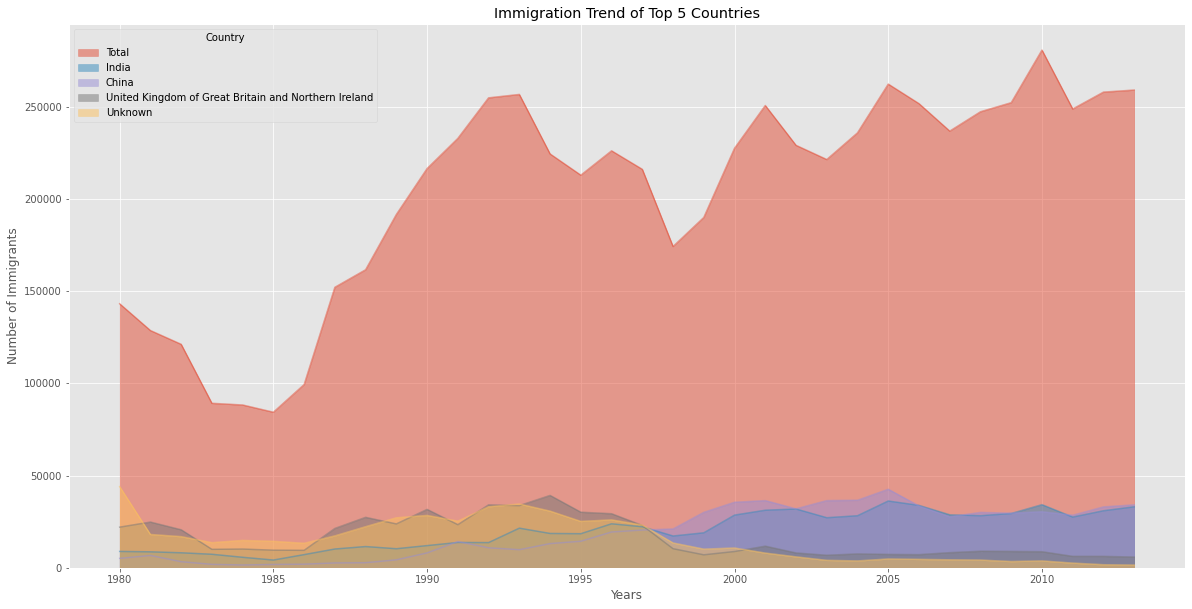

In [15]:
df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5.plot(kind='area', 
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

The unstacked plot has a default transparency (alpha value) at 0.5. We can modify this value by passing in the `alpha` parameter.


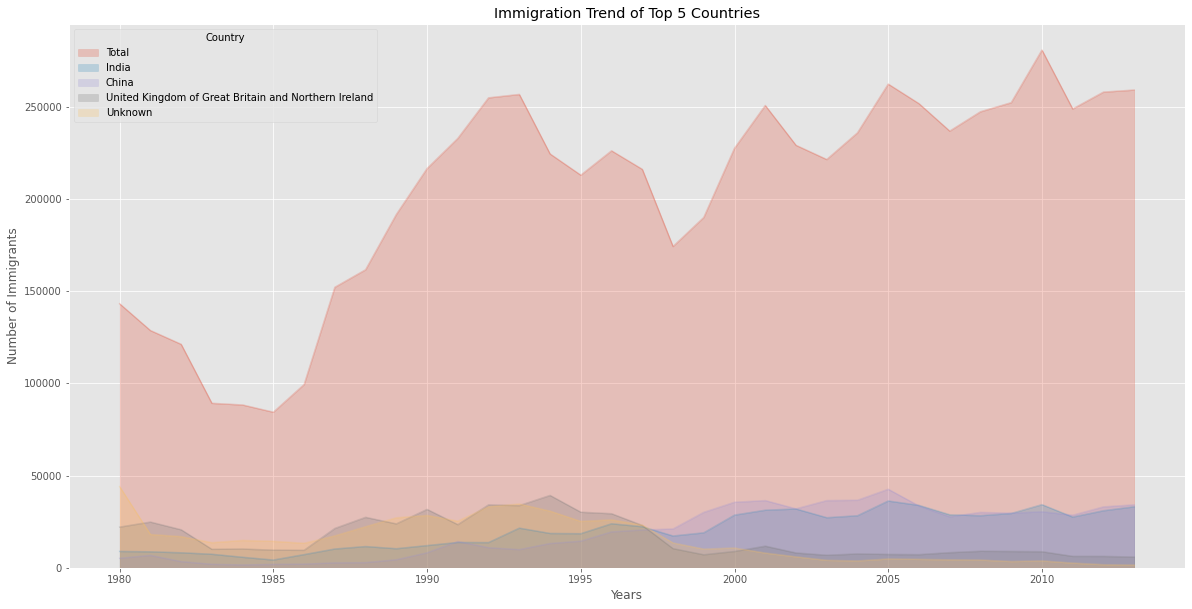

In [16]:
df_top5.plot(kind='area', 
             alpha=0.25, # 0-1, default value a= 0.5
             stacked=False,
             figsize=(20, 10),
            )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

### Two types of plotting

As we discussed in the video lectures, there are two styles/options of ploting with `matplotlib`. Plotting using the Artist layer and plotting using the scripting layer.

**Option 1: Scripting layer (procedural method) - using matplotlib.pyplot as 'plt' **

You can use `plt` i.e. `matplotlib.pyplot` and add more elements by calling different methods procedurally; for example, `plt.title(...)` to add title or `plt.xlabel(...)` to add label to the x-axis.

```python
    # Option 1: This is what we have been using so far
    df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10)) 
    plt.title('Immigration trend of top 5 countries')
    plt.ylabel('Number of immigrants')
    plt.xlabel('Years')
```


**Option 2: Artist layer (Object oriented method) - using an `Axes` instance from Matplotlib (preferred) **

You can use an `Axes` instance of your current plot and store it in a variable (eg. `ax`). You can add more elements by calling methods with a little change in syntax (by adding "_set__" to the previous methods). For example, use `ax.set_title()` instead of `plt.title()` to add title,  or `ax.set_xlabel()` instead of `plt.xlabel()` to add label to the x-axis. 

This option sometimes is more transparent and flexible to use for advanced plots (in particular when having multiple plots, as you will see later). 

In this course, we will stick to the **scripting layer**, except for some advanced visualizations where we will need to use the **artist layer** to manipulate advanced aspects of the plots.


Text(0.5, 0, 'Years')

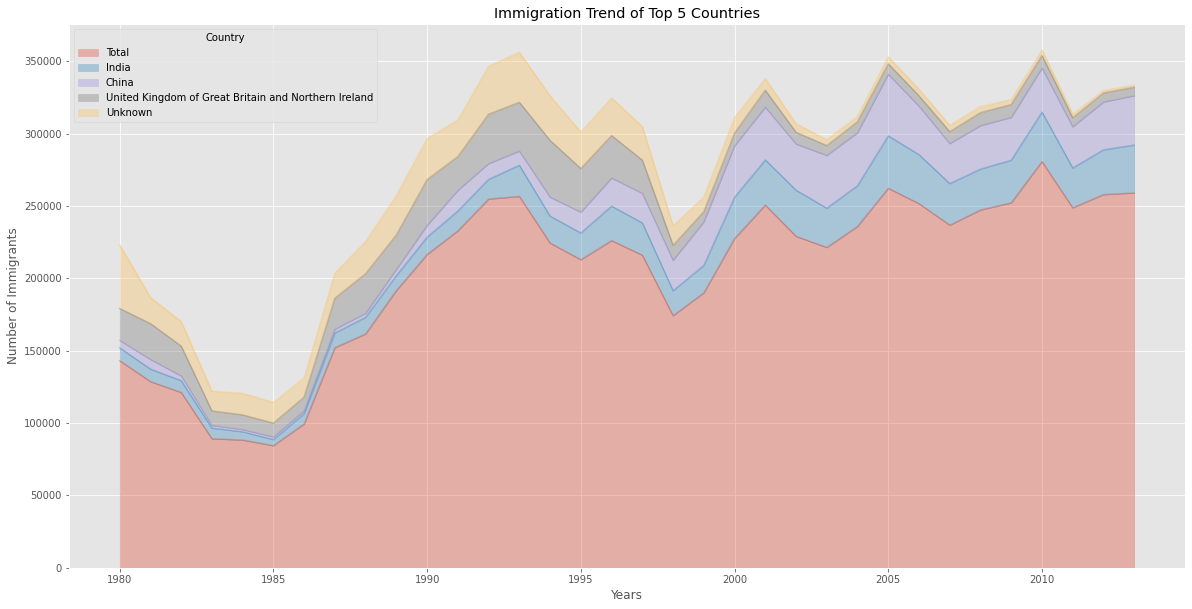

In [17]:
# option 2: preferred option with more flexibility
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

**Question**: Use the scripting layer to create a stacked area plot of the 5 countries that contributed the least to immigration to Canada **from** 1980 to 2013. Use a transparency value of 0.45.


In [36]:

df_can_c = df_can.dropna(subset = ['Continent','Total'])
df_can_c

bottom5 = df_can_c.tail(5)

df_bottom5 = bottom5[years].T

Text(0.5, 0, 'Years')

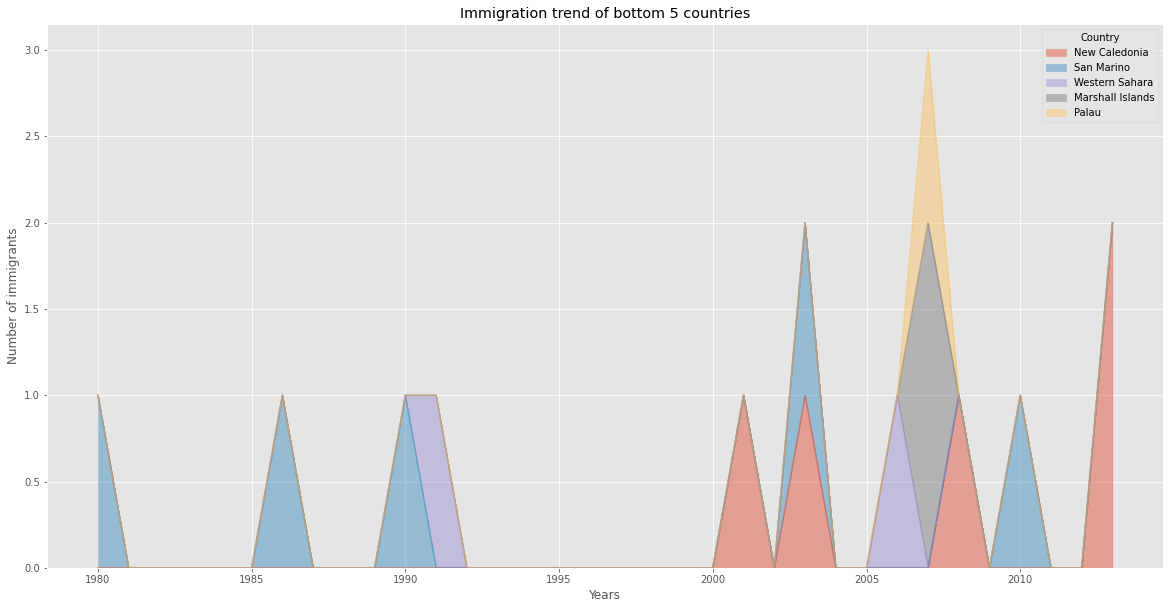

In [37]:
### type your answer here



df_bottom5.plot(kind='area', alpha=0.45, figsize=(20, 10)) 
plt.title('Immigration trend of bottom 5 countries')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')



<details><summary>Click here for a sample python solution</summary>

```python
    #The correct answer is:
    # get the 5 countries with the least contribution
    df_least5 = df_can.tail(5)
     
    # transpose the dataframe
    df_least5 = df_least5[years].transpose() 
    df_least5.head()

    df_least5.index = df_least5.index.map(int) # let's change the index values of df_least5 to type integer for plotting
    df_least5.plot(kind='area', alpha=0.45, figsize=(20, 10)) 

    plt.title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
    plt.ylabel('Number of Immigrants')
    plt.xlabel('Years')

    plt.show()
    
```

</details>


**Question**: Use the artist layer to create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada **from** 1980 to 2013. Use a transparency value of 0.55.


Text(0.5, 0, 'Years')

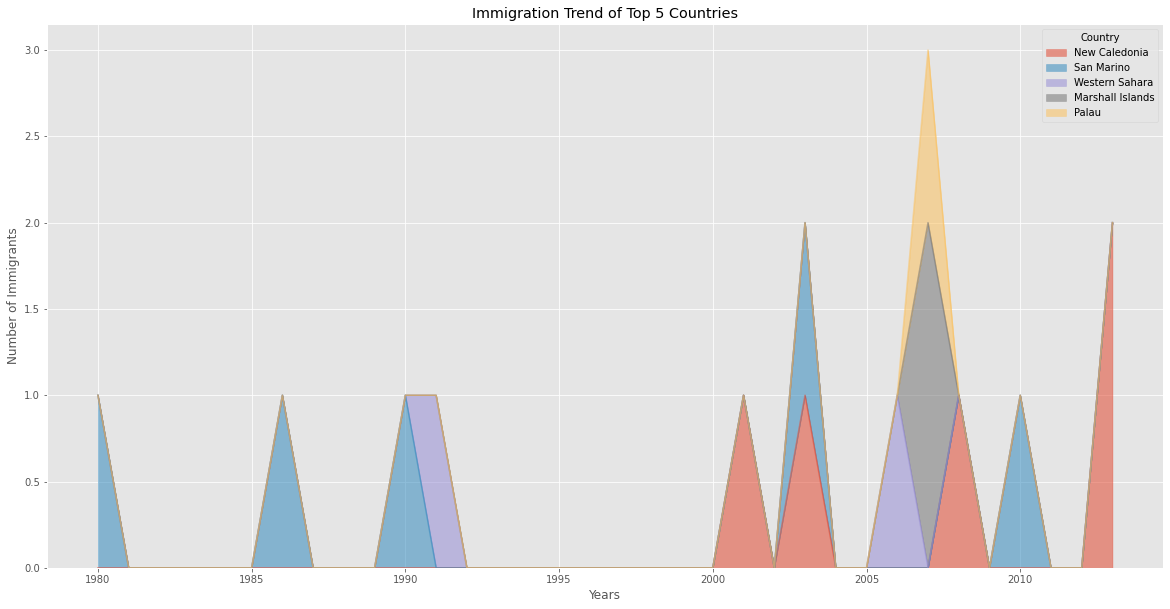

In [38]:
### type your answer here



ax = df_bottom5.plot(kind='area', alpha=0.55, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

<details><summary>Click here for a sample python solution</summary>

```python
    #The correct answer is:
    
    # get the 5 countries with the least contribution
    df_least5 = df_can.tail(5)

    # transpose the dataframe
    df_least5 = df_least5[years].transpose() 
    
    df_least5.head()

    df_least5.index = df_least5.index.map(int) # let's change the index values of df_least5 to type integer for plotting
    
    ax = df_least5.plot(kind='area', alpha=0.55, stacked=False, figsize=(20, 10))
    
    ax.set_title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
    ax.set_ylabel('Number of Immigrants')
    ax.set_xlabel('Years')

    
```

</details>


# Histograms<a id="8"></a>

A histogram is a way of representing the _frequency_ distribution of numeric dataset. The way it works is it partitions the x-axis into _bins_, assigns each data point in our dataset to a bin, and then counts the number of data points that have been assigned to each bin. So the y-axis is the frequency or the number of data points in each bin. Note that we can change the bin size and usually one needs to tweak it so that the distribution is displayed nicely.


**Question:** What is the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013?


Before we proceed with creating the histogram plot, let's first examine the data split into intervals. To do this, we will us **Numpy**'s `histrogram` method to get the bin ranges and frequency counts as follows:


In [39]:
# let's quickly view the 2013 data
df_can['2013'].head()

Country
Total                                                   259021.0
India                                                    33087.0
China                                                    34129.0
United Kingdom of Great Britain and Northern Ireland      5827.0
Unknown                                                   1484.0
Name: 2013, dtype: float64

In [42]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(df_can_c['2013'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[193   3   0   0   0   0   0   0   0   1]
[     0.   25902.1  51804.2  77706.3 103608.4 129510.5 155412.6 181314.7
 207216.8 233118.9 259021. ]


By default, the `histrogram` method breaks up the dataset into 10 bins. The figure below summarizes the bin ranges and the frequency distribution of immigration in 2013. We can see that in 2013:

-   178 countries contributed between 0 to 3412.9 immigrants 
-   11 countries contributed between 3412.9 to 6825.8 immigrants
-   1 country contributed between 6285.8 to 10238.7 immigrants, and so on..

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/Mod2Fig1-Histogram.JPG" align="center" width=800>


We can easily graph this distribution by passing `kind=hist` to `plot()`.


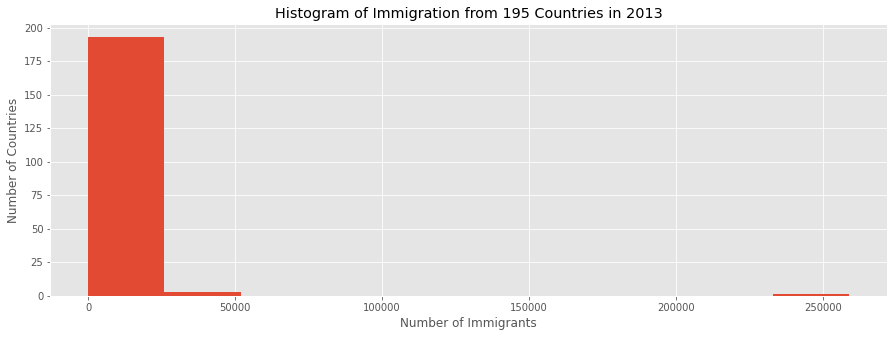

In [47]:
df_can['2013'].plot(kind='hist', figsize=(15, 5))

plt.title('Histogram of Immigration from 195 Countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

In the above plot, the x-axis represents the population range of immigrants in intervals of 3412.9. The y-axis represents the number of countries that contributed to the aforementioned population. 

Notice that the x-axis labels do not match with the bin size. This can be fixed by passing in a `xticks` keyword that contains the list of the bin sizes, as follows:


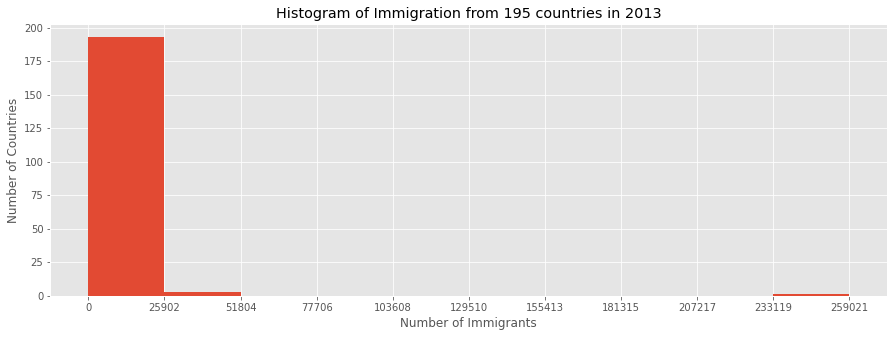

In [46]:
# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(df_can_c['2013'])

df_can_c['2013'].plot(kind='hist', figsize=(15, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

_Side Note:_ We could use `df_can['2013'].plot.hist()`, instead. In fact, throughout this lesson, using `some_data.plot(kind='type_plot', ...)` is equivalent to `some_data.plot.type_plot(...)`. That is, passing the type of the plot as argument or method behaves the same. 

See the _pandas_ documentation for more info  [http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


We can also plot multiple histograms on the same plot. For example, let's try to answer the following questions using a histogram.

**Question**: What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?


In [48]:
# let's quickly view the dataset 
df_can.loc[['Denmark', 'Norway', 'Sweden'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272.0,293.0,299.0,106.0,93.0,73.0,93.0,109.0,129.0,129.0,...,89.0,62.0,101.0,97.0,108.0,81.0,92.0,93.0,94.0,81.0
Norway,116.0,77.0,106.0,51.0,31.0,54.0,56.0,80.0,73.0,76.0,...,73.0,57.0,53.0,73.0,66.0,75.0,46.0,49.0,53.0,59.0
Sweden,281.0,308.0,222.0,176.0,128.0,158.0,187.0,198.0,171.0,182.0,...,129.0,205.0,139.0,193.0,165.0,167.0,159.0,134.0,140.0,140.0


<AxesSubplot:ylabel='Frequency'>

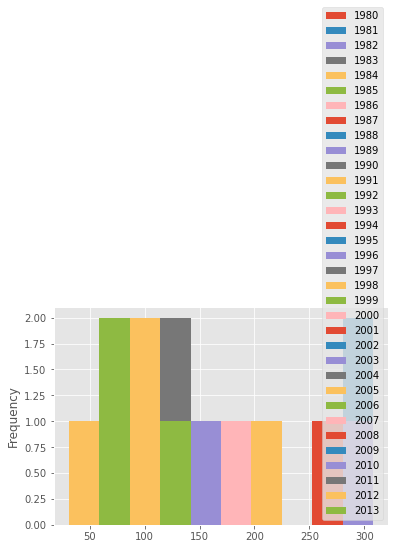

In [49]:
# generate histogram
df_can.loc[['Denmark', 'Norway', 'Sweden'], years].plot.hist()

That does not look right! 

Don't worry, you'll often come across situations like this when creating plots. The solution often lies in how the underlying dataset is structured.

Instead of plotting the population frequency distribution of the population for the 3 countries, _pandas_ instead plotted the population frequency distribution for the `years`.

This can be easily fixed by first transposing the dataset, and then plotting as shown below.


In [56]:
# transpose dataframe
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t

Country,Denmark,Norway,Sweden
1980,272.0,116.0,281.0
1981,293.0,77.0,308.0
1982,299.0,106.0,222.0
1983,106.0,51.0,176.0
1984,93.0,31.0,128.0
1985,73.0,54.0,158.0
1986,93.0,56.0,187.0
1987,109.0,80.0,198.0
1988,129.0,73.0,171.0
1989,129.0,76.0,182.0


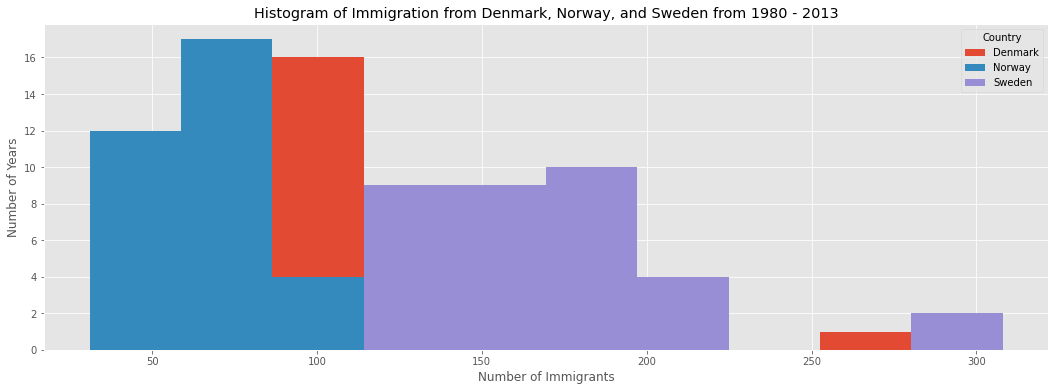

In [55]:
# generate histogram
df_t.plot(kind='hist', figsize=(18, 6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Let's make a few modifications to improve the impact and aesthetics of the previous plot:

-   increase the bin size to 15 by passing in `bins` parameter
-   set transparency to 60% by passing in `alpha` paramemter
-   label the x-axis by passing in `x-label` paramater
-   change the colors of the plots by passing in `color` parameter


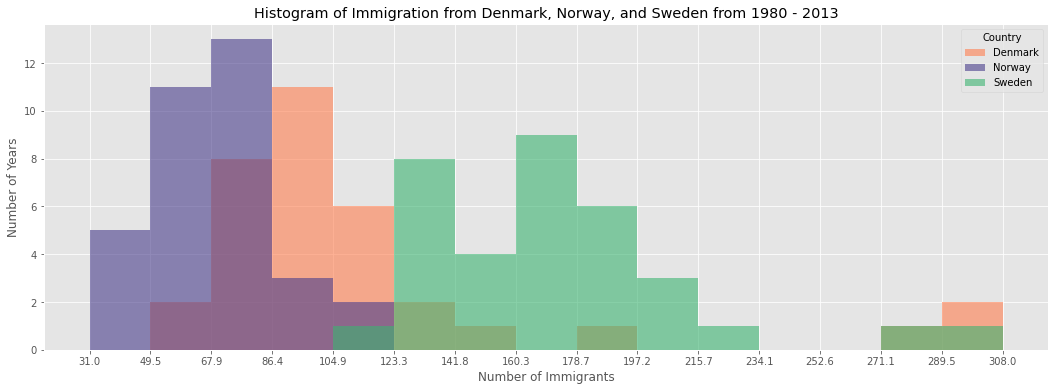

In [53]:
# let's get the x-tick values
count, bin_edges = np.histogram(df_t, 15)

# un-stacked histogram
df_t.plot(kind ='hist', 
          figsize=(18, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Tip:
For a full listing of colors available in Matplotlib, run the following code in your python shell:

```python
import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)
```


If we do no want the plots to overlap each other, we can stack them using the `stacked` paramemter. Let's also adjust the min and max x-axis labels to remove the extra gap on the edges of the plot. We can pass a tuple (min,max) using the `xlim` paramater, as show below.


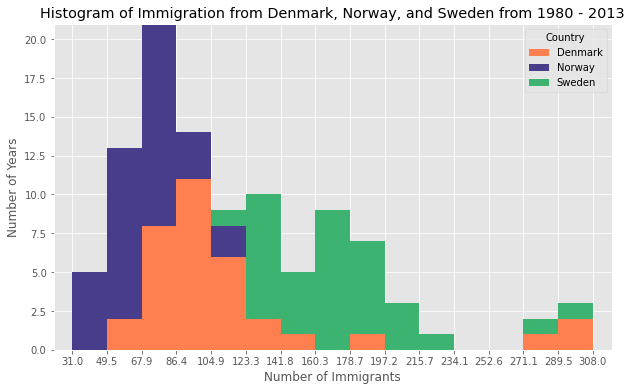

In [54]:
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

# stacked Histogram
df_t.plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()

**Question**: Use the scripting layer to display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.


In [58]:
### type your answer here

df_tr = df_can.loc[['Greece', 'Albania', 'Bulgaria'], years].transpose()
df_tr



Country,Greece,Albania,Bulgaria
1980,1065.0,1.0,24.0
1981,953.0,0.0,20.0
1982,897.0,0.0,12.0
1983,633.0,0.0,33.0
1984,580.0,0.0,11.0
1985,584.0,0.0,24.0
1986,547.0,1.0,33.0
1987,765.0,2.0,52.0
1988,564.0,2.0,43.0
1989,773.0,3.0,85.0


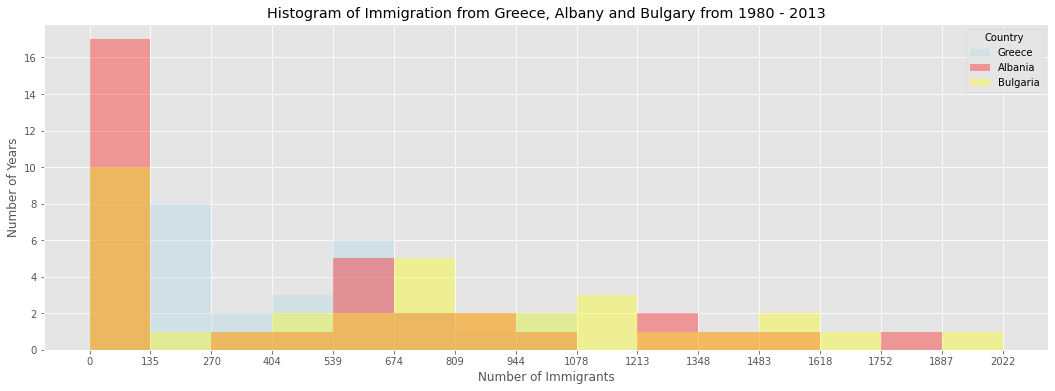

In [61]:
count, bin_edges = np.histogram(df_tr, 15)

# un-stacked histogram
df_tr.plot(kind ='hist', 
          figsize=(18, 6),
          bins=15,
          alpha=0.35,
          xticks=bin_edges,
          color=['lightblue', 'red', 'yellow']
         )

plt.title('Histogram of Immigration from Greece, Albany and Bulgary from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

<details><summary>Click here for a sample python solution</summary>

```python
    #The correct answer is:
    
    # create a dataframe of the countries of interest (cof)
    df_cof = df_can.loc[['Greece', 'Albania', 'Bulgaria'], years]

    # transpose the dataframe
    df_cof = df_cof.transpose() 

    # let's get the x-tick values
    count, bin_edges = np.histogram(df_cof, 15)

    # Un-stacked Histogram
    df_cof.plot(kind ='hist',
                figsize=(10, 6),
                bins=15,
                alpha=0.35,
                xticks=bin_edges,
                color=['coral', 'darkslateblue', 'mediumseagreen']
                )

    plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
    plt.ylabel('Number of Years')
    plt.xlabel('Number of Immigrants')

    plt.show()

    
```

</details>


# Bar Charts (Dataframe) <a id="10"></a>

A bar plot is a way of representing data where the _length_ of the bars represents the magnitude/size of the feature/variable. Bar graphs usually represent numerical and categorical variables grouped in intervals. 

To create a bar plot, we can pass one of two arguments via `kind` parameter in `plot()`:

-   `kind=bar` creates a _vertical_ bar plot
-   `kind=barh` creates a _horizontal_ bar plot


**Vertical bar plot**

In vertical bar graphs, the x-axis is used for labelling, and the length of bars on the y-axis corresponds to the magnitude of the variable being measured. Vertical bar graphs are particuarly useful in analyzing time series data. One disadvantage is that they lack space for text labelling at the foot of each bar. 

**Let's start off by analyzing the effect of Iceland's Financial Crisis:**

The 2008 - 2011 Icelandic Financial Crisis was a major economic and political event in Iceland. Relative to the size of its economy, Iceland's systemic banking collapse was the largest experienced by any country in economic history. The crisis led to a severe economic depression in 2008 - 2011 and significant political unrest.

**Question:** Let's compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013. 


In [62]:
# step 1: get the data
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

1980    17.0
1981    33.0
1982    10.0
1983     9.0
1984    13.0
Name: Iceland, dtype: object

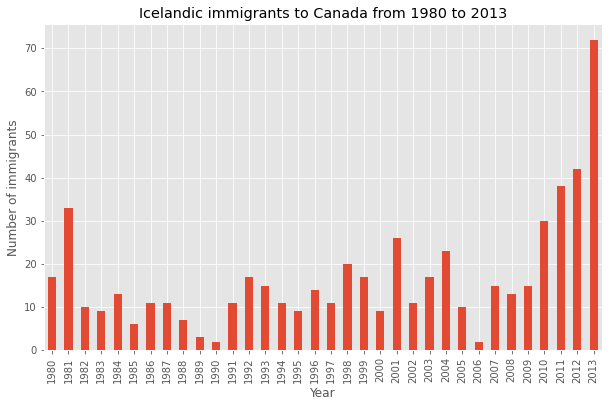

In [63]:
# step 2: plot data
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

The bar plot above shows the total number of immigrants broken down by each year. We can clearly see the impact of the financial crisis; the number of immigrants to Canada started increasing rapidly after 2008. 

Let's annotate this on the plot using the `annotate` method of the **scripting layer** or the **pyplot interface**. We will pass in the following parameters:

-   `s`: str, the text of annotation.
-   `xy`: Tuple specifying the (x,y) point to annotate (in this case, end point of arrow).
-   `xytext`: Tuple specifying the (x,y) point to place the text (in this case, start point of arrow).
-   `xycoords`: The coordinate system that xy is given in - 'data' uses the coordinate system of the object being annotated (default).
-   `arrowprops`: Takes a dictionary of properties to draw the arrow:
    -   `arrowstyle`: Specifies the arrow style, `'->'` is standard arrow.
    -   `connectionstyle`: Specifies the connection type. `arc3` is a straight line.
    -   `color`: Specifes color of arror.
    -   `lw`: Specifies the line width.

I encourage you to read the Matplotlib documentation for more details on annotations: 
[http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.annotate](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.annotate?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


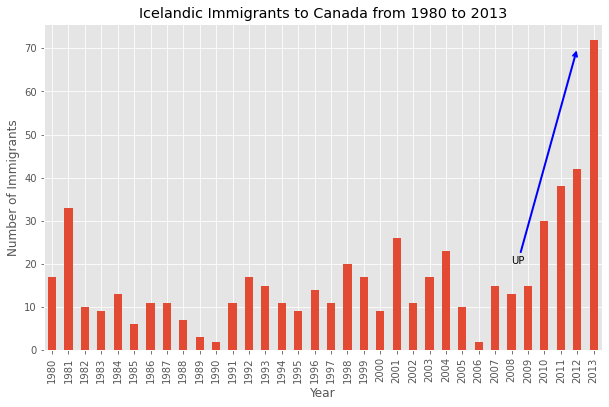

In [65]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) # rotate the xticks(labelled points on x-axis) by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('UP',                      # s: str. Will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

plt.show()

Let's also annotate a text to go over the arrow.  We will pass in the following additional parameters:

-   `rotation`: rotation angle of text in degrees (counter clockwise)
-   `va`: vertical alignment of text [‘center’ | ‘top’ | ‘bottom’ | ‘baseline’]
-   `ha`: horizontal alignment of text [‘center’ | ‘right’ | ‘left’]


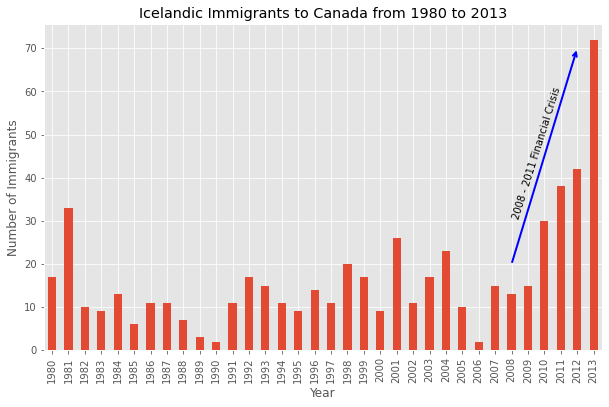

In [66]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) 

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',                      # s: str. will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis', # text to display
             xy=(28, 30),                    # start the text at at point (year 2008 , pop 30)
             rotation=72.5,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )

plt.show()

**Horizontal Bar Plot**

Sometimes it is more practical to represent the data horizontally, especially if you need more room for labelling the bars. In horizontal bar graphs, the y-axis is used for labelling, and the length of bars on the x-axis corresponds to the magnitude of the variable being measured. As you will see, there is more room on the y-axis to  label categetorical variables.

**Question:** Using the scripting layter and the `df_can` dataset, create a _horizontal_ bar plot showing the _total_ number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.


Step 1: Get the data pertaining to the top 15 countries.


In [70]:
### type your answer here

top15 = df_can.iloc[1:16]
top15

df_top15 = top15[years].T
df_top15


Country,India,China,United Kingdom of Great Britain and Northern Ireland,Unknown,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,Poland,Lebanon,France,Jamaica,Viet Nam
1980,8880.0,5123.0,22045.0,44000.0,6051.0,978.0,9378.0,1172.0,185.0,1011.0,863.0,1409.0,1729.0,3198.0,1191.0
1981,8670.0,6682.0,24796.0,18078.0,5921.0,972.0,10030.0,1429.0,371.0,1456.0,2930.0,1119.0,2027.0,2634.0,1829.0
1982,8147.0,3308.0,20620.0,16904.0,5249.0,1201.0,9074.0,1822.0,290.0,1572.0,5881.0,1159.0,2219.0,2661.0,2162.0
1983,7338.0,1863.0,10015.0,13635.0,4562.0,900.0,7100.0,1592.0,197.0,1081.0,4546.0,789.0,1490.0,2455.0,3404.0
1984,5704.0,1527.0,10170.0,14855.0,3801.0,668.0,6661.0,1977.0,1086.0,847.0,3588.0,1253.0,1169.0,2508.0,7583.0
1985,4211.0,1816.0,9564.0,14368.0,3150.0,514.0,6543.0,1648.0,845.0,962.0,2819.0,1683.0,1177.0,2938.0,5907.0
1986,7150.0,1960.0,9470.0,13303.0,4166.0,691.0,7074.0,1794.0,1838.0,1208.0,4808.0,2576.0,1298.0,4649.0,2741.0
1987,10189.0,2643.0,21337.0,17304.0,7360.0,1072.0,7705.0,2989.0,4447.0,2338.0,6931.0,3803.0,1658.0,5415.0,1406.0
1988,11522.0,2758.0,27359.0,22279.0,8639.0,1334.0,6469.0,3273.0,2779.0,2805.0,9211.0,3970.0,2038.0,3924.0,1411.0
1989,10343.0,4323.0,23795.0,27118.0,11865.0,2261.0,6790.0,3781.0,2758.0,2979.0,16025.0,7157.0,2332.0,3946.0,3004.0


<details><summary>Click here for a sample python solution</summary>

```python
    #The correct answer is:
    
    # sort dataframe on 'Total' column (descending)
    df_can.sort_values(by='Total', ascending=True, inplace=True)

    # get top 15 countries
    df_top15 = df_can['Total'].tail(15)
    df_top15

```

</details>


Step 2: Plot data:

1.  Use `kind='barh'` to generate a bar chart with horizontal bars.
2.  Make sure to choose a good size for the plot and to label your axes and to give the plot a title.
3.  Loop through the countries and annotate the immigrant population using the anotate function of the scripting interface.


ValueError: invalid literal for int() with base 10: 'India'

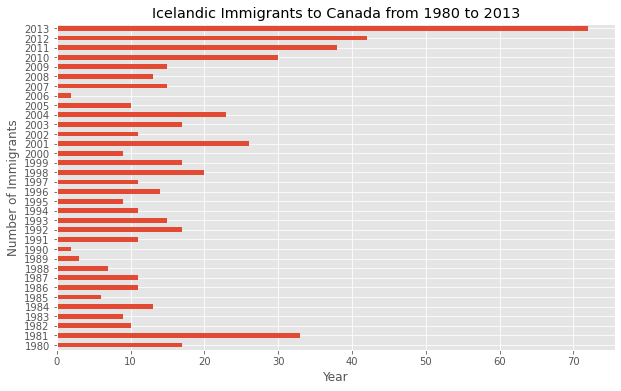

In [83]:
### type your answer here
df_iceland.plot(kind='barh', figsize=(10, 6)) # rotate the xticks(labelled points on x-axis) by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # format int with commas

    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')

plt.show()

ValueError: invalid literal for int() with base 10: 'India'

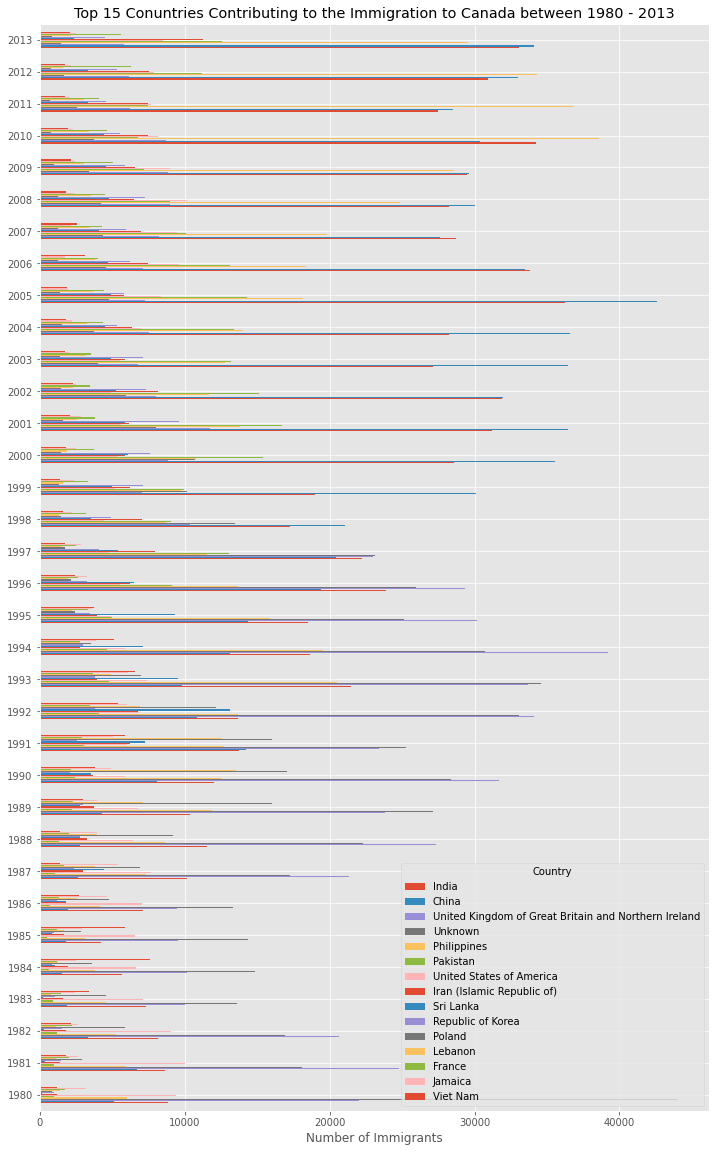

In [90]:
df_top15.plot(kind='barh', figsize=(12, 20))
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

for index, value in enumerate(df_top15): 
    label = format(int(value), ',')

plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')

plt.show()

<details><summary>Click here for a sample python solution</summary>

```python
    #The correct answer is:
    
    # generate plot
    df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
    plt.xlabel('Number of Immigrants')
    plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

    # annotate value labels to each country
    for index, value in enumerate(df_top15): 
        label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
        plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')

    plt.show()

```

</details>


### Thank you for completing this lab!

## Author

<a href="https://www.linkedin.com/in/aklson/" target="_blank">Alex Aklson</a>

### Other Contributors

[Jay Rajasekharan](https://www.linkedin.com/in/jayrajasekharan?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)
[Ehsan M. Kermani](https://www.linkedin.com/in/ehsanmkermani?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)
[Slobodan Markovic](https://www.linkedin.com/in/slobodan-markovic?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).

## Exercises resolved by José Antonio Peño

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                 |
| ----------------- | ------- | ------------- | ---------------------------------- |
| 2021-01-05        | 2.2     | Lakshmi Holla | Changed solution code for annotate |
| 2020-11-03        | 2.1     | Lakshmi Holla | Changed the URL of excel file      |
| 2020-08-27        | 2.0     | Lavanya       | Moved lab to course repo in GitLab |

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
